# **Importing Packages and Libraries**

In [1]:
%pip install statsmodels

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

import statsmodels.api as sm

from sklearn import linear_model
from sklearn.linear_model import LinearRegression

# **Analysis for Germany**

In [3]:
df_germany = pd.read_csv("Germany.csv", sep = ",")
df_germany

,Year,Ton Exports (Viet),Value (Viet),Adjust Value (Viet - 2010 USD),Ton Exports (Brazil),Value (Brazil),Adjust Value (Brazil - 2010 USD),% Share of Viet Exports,GDP,Inflation,Unit Value (Viet),Unit Value (Brazil),Transport Cost (Viet),Transport Cost (Brazil),Total Production (Viet),Total Production (Brazil),Total Production (World),Total Production Percentage (Viet),Total Production Percentage (Brazil)
0,2010,151378,233014.8460,233014.85,385747.34,1136098.37,1136098.37,0.124298,3.400000e+12,1.103810,1.539291,2.945188,100.00,100.00,1164900,3270000,8484540,13.73,38.54
1,2011,135893,296249.4650,287361.98,361691.84,1663846.26,1613930.87,0.108161,3.750000e+12,2.075173,2.114619,4.462171,98.03,114.00,1560000,2952000,8690220,17.95,33.97
2,2012,207919,427178.2750,405819.36,289662.62,1121761.90,1065673.80,0.120035,3.530000e+12,2.008489,1.951815,3.679017,102.04,95.62,1590000,3456000,9481080,16.77,36.45
3,2013,184957,364692.8180,342811.25,327842.81,859944.08,808347.43,0.142069,3.730000e+12,1.504723,1.853465,2.465656,104.84,98.32,1789980,3432000,9603240,18.64,35.74
4,2014,253439,504571.7829,464206.04,397823.80,1274429.05,1172474.72,0.149865,3.890000e+12,0.906794,1.831627,2.947221,102.68,98.76,1644000,3258000,9227760,17.82,35.31
5,2015,193961,363353.9400,334285.62,386238.88,1055747.82,971287.99,0.144639,3.360000e+12,0.514426,1.723468,2.514734,86.37,62.43,1735800,2964000,9144240,18.98,32.41
6,2016,275679,493812.1270,449369.04,370836.84,953748.03,867910.70,0.154733,3.470000e+12,0.491747,1.630044,2.340411,85.53,60.40,1602000,3366000,9667740,16.57,34.82
7,2017,222663,476522.0190,424104.60,329071.67,879183.42,782473.24,0.154404,3.690000e+12,1.509495,1.904693,2.377820,89.69,77.79,1758000,3126000,9590340,18.33,32.60
8,2018,260475,459031.2500,399357.19,323563.51,749513.70,652076.92,0.138678,3.970000e+12,1.732169,1.533188,2.015298,98.69,94.46,1824000,3990000,10557360,17.28,37.79
9,2019,234569,366278.8300,311337.01,383933.51,793428.15,674413.92,0.141882,3.890000e+12,1.445660,1.327273,1.756590,104.96,79.65,1878000,3630000,10144800,18.51,35.78


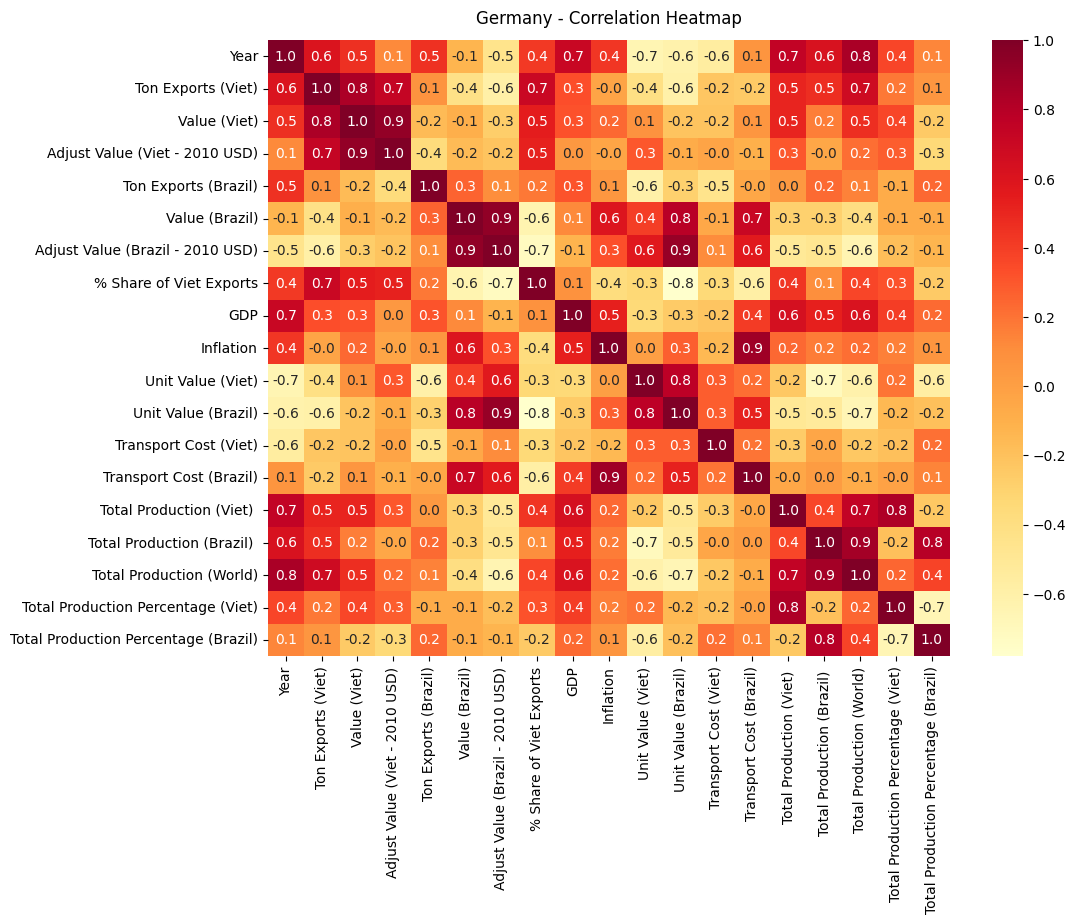

In [4]:
corr_germany = df_germany.corr()
plt.figure(figsize=(11,8))

# matrix = np.triu(corr)
# sns.heatmap(corr, cmap="YlOrRd",annot=True, fmt=".1f", mask = matrix)

ger_heatmap = sns.heatmap(corr_germany, cmap="YlOrRd",annot=True, fmt=".1f")
ger_heatmap.set_title('Germany - Correlation Heatmap', fontdict={'fontsize':12}, pad=12);
plt.show()

Text(0.5, 0, 'Year')

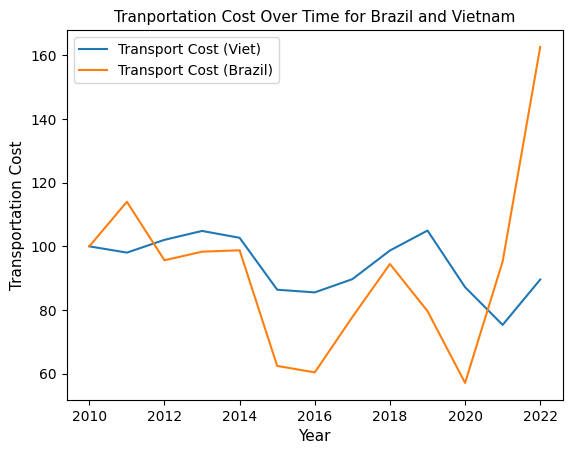

In [5]:
ax = plt.gca()

df_germany.plot(x = "Year",
                y = "Transport Cost (Viet)",
                ax = ax)

df_germany.plot(x = "Year",
                y = "Transport Cost (Brazil)",
                ax = ax)
plt.title('Tranportation Cost Over Time for Brazil and Vietnam', fontsize=11)
plt.ylabel('Transportation Cost', fontsize=11)
plt.xlabel('Year', fontsize=11)


Text(0.5, 0, 'Year')

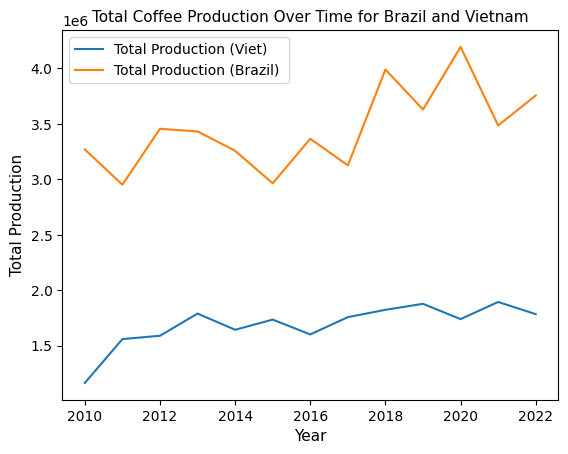

In [6]:
ax = plt.gca()

df_germany.plot(x = "Year",
                y = "Total Production (Viet) ",
                ax = ax)

df_germany.plot(x = "Year",
                y = "Total Production (Brazil) ",
                ax = ax)

plt.title('Total Coffee Production Over Time for Brazil and Vietnam',fontsize=11)
plt.ylabel('Total Production', fontsize=11)
plt.xlabel('Year', fontsize=11)

Text(0.5, 0, 'Year')

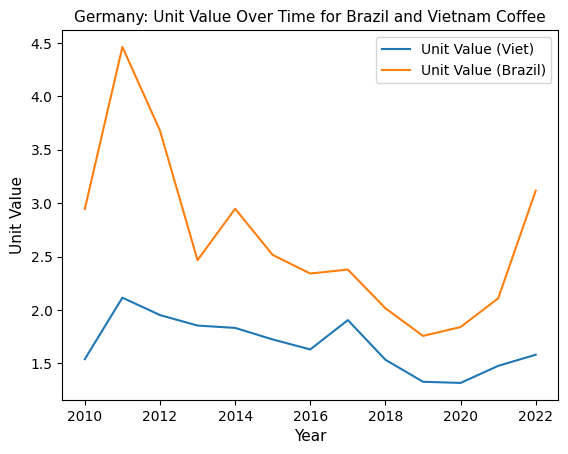

In [7]:
ax = plt.gca()

df_germany.plot(x = "Year",
                y = "Unit Value (Viet)",
                ax = ax)

df_germany.plot(x = "Year",
                y = "Unit Value (Brazil)",
                ax = ax)

plt.title('Germany: Unit Value Over Time for Brazil and Vietnam Coffee',fontsize=11)
plt.ylabel('Unit Value', fontsize=11)
plt.xlabel('Year', fontsize=11)

In [8]:
# df_germany.columns
df_germany.rename(columns={"Year": "GER_year",
                           "% Share of Viet Exports": "GER_percent_share",
                           "GDP": "GER_GDP",
                           "Inflation": "GER_Inflation",
                           "Unit Value (Viet)": "GER_UV_Viet",
                           "Unit Value (Brazil)": "GER_UV_Bra",
                           "Transport Cost (Viet)": "GER_Transport_Viet",
                           "Transport Cost (Brazil)": "GER_Transport_Bra",
                           "Total Production (Viet) ": "TP_Viet",
                           "Total Production (Brazil) ": "TP_Bra",
                           "Total Production (World)": "TP_World"
                           }, inplace=True)

df_germany

,GER_year,Ton Exports (Viet),Value (Viet),Adjust Value (Viet - 2010 USD),Ton Exports (Brazil),Value (Brazil),Adjust Value (Brazil - 2010 USD),GER_percent_share,GER_GDP,GER_Inflation,GER_UV_Viet,GER_UV_Bra,GER_Transport_Viet,GER_Transport_Bra,TP_Viet,TP_Bra,TP_World,Total Production Percentage (Viet),Total Production Percentage (Brazil)
0,2010,151378,233014.8460,233014.85,385747.34,1136098.37,1136098.37,0.124298,3.400000e+12,1.103810,1.539291,2.945188,100.00,100.00,1164900,3270000,8484540,13.73,38.54
1,2011,135893,296249.4650,287361.98,361691.84,1663846.26,1613930.87,0.108161,3.750000e+12,2.075173,2.114619,4.462171,98.03,114.00,1560000,2952000,8690220,17.95,33.97
2,2012,207919,427178.2750,405819.36,289662.62,1121761.90,1065673.80,0.120035,3.530000e+12,2.008489,1.951815,3.679017,102.04,95.62,1590000,3456000,9481080,16.77,36.45
3,2013,184957,364692.8180,342811.25,327842.81,859944.08,808347.43,0.142069,3.730000e+12,1.504723,1.853465,2.465656,104.84,98.32,1789980,3432000,9603240,18.64,35.74
4,2014,253439,504571.7829,464206.04,397823.80,1274429.05,1172474.72,0.149865,3.890000e+12,0.906794,1.831627,2.947221,102.68,98.76,1644000,3258000,9227760,17.82,35.31
5,2015,193961,363353.9400,334285.62,386238.88,1055747.82,971287.99,0.144639,3.360000e+12,0.514426,1.723468,2.514734,86.37,62.43,1735800,2964000,9144240,18.98,32.41
6,2016,275679,493812.1270,449369.04,370836.84,953748.03,867910.70,0.154733,3.470000e+12,0.491747,1.630044,2.340411,85.53,60.40,1602000,3366000,9667740,16.57,34.82
7,2017,222663,476522.0190,424104.60,329071.67,879183.42,782473.24,0.154404,3.690000e+12,1.509495,1.904693,2.377820,89.69,77.79,1758000,3126000,9590340,18.33,32.60
8,2018,260475,459031.2500,399357.19,323563.51,749513.70,652076.92,0.138678,3.970000e+12,1.732169,1.533188,2.015298,98.69,94.46,1824000,3990000,10557360,17.28,37.79
9,2019,234569,366278.8300,311337.01,383933.51,793428.15,674413.92,0.141882,3.890000e+12,1.445660,1.327273,1.756590,104.96,79.65,1878000,3630000,10144800,18.51,35.78


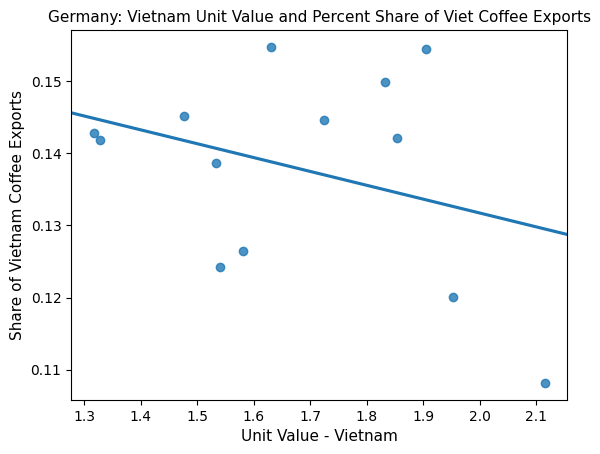

In [9]:
sns.regplot(data=df_germany, x="GER_UV_Viet", y="GER_percent_share", robust= True, ci = None, truncate = False)
plt.title('Germany: Vietnam Unit Value and Percent Share of Viet Coffee Exports', fontsize=11)
plt.ylabel('Share of Vietnam Coffee Exports', fontsize=11)
plt.xlabel('Unit Value - Vietnam', fontsize=11)
plt.show()

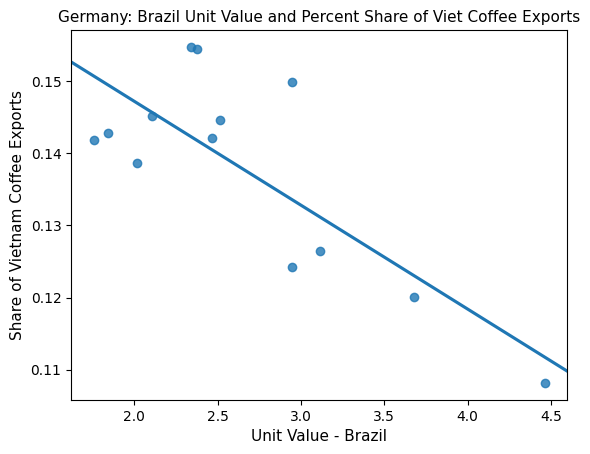

In [10]:
sns.regplot(data=df_germany, x="GER_UV_Bra", y="GER_percent_share", robust= True, ci = None, truncate = False)
plt.title('Germany: Brazil Unit Value and Percent Share of Viet Coffee Exports', fontsize=11)
plt.ylabel('Share of Vietnam Coffee Exports', fontsize=11)
plt.xlabel('Unit Value - Brazil', fontsize=11)
plt.show()



> **Regression Analysis**



In [11]:
ger_x_reg = df_germany[['GER_GDP', 'GER_Inflation', 'GER_UV_Viet', 'GER_UV_Bra', 'GER_Transport_Viet', 'GER_Transport_Bra']]
ger_y_reg = df_germany['GER_percent_share']

In [12]:
ger_x_reg = sm.add_constant(ger_x_reg)
ger_model = sm.OLS(ger_y_reg, ger_x_reg).fit()
ger_predictions = ger_model.predict(ger_x_reg)

ger_print_model = ger_model.summary()
print(ger_print_model)

                            OLS Regression Results                            
Dep. Variable:      GER_percent_share   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     5.213
Date:                Mon, 11 Dec 2023   Prob (F-statistic):             0.0323
Time:                        17:49:34   Log-Likelihood:                 49.375
No. Observations:                  13   AIC:                            -84.75
Df Residuals:                       6   BIC:                            -80.79
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1802      0

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "




> **Regression Analysis with 'robust'**



In [13]:
ger_model_robust = sm.OLS(ger_y_reg, ger_x_reg).fit(cov_type='HC1')
ger_predictions_robust = ger_model_robust.predict(ger_x_reg)

ger_print_model_robust = ger_model.summary()
print(ger_print_model_robust)

                            OLS Regression Results                            
Dep. Variable:      GER_percent_share   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     5.213
Date:                Mon, 11 Dec 2023   Prob (F-statistic):             0.0323
Time:                        17:49:34   Log-Likelihood:                 49.375
No. Observations:                  13   AIC:                            -84.75
Df Residuals:                       6   BIC:                            -80.79
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1802      0

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "




> **Regression Analysis Without UV_Viet**



In [14]:
ger_x_reg_no_UV_viet = df_germany[['GER_GDP', 'GER_Inflation', 'GER_UV_Bra', 'GER_Transport_Viet', 'GER_Transport_Bra']]
ger_y_reg_no_UV_viet = df_germany['GER_percent_share']

In [15]:
ger_x_reg_no_UV_viet = sm.add_constant(ger_x_reg_no_UV_viet)

ger_model_no_UV_viet = sm.OLS(ger_y_reg_no_UV_viet, ger_x_reg_no_UV_viet).fit(cov_type='HC1')
ger_predictions_no_UV_viet = ger_model_no_UV_viet.predict(ger_x_reg_no_UV_viet)

print(ger_model_no_UV_viet.summary())

                            OLS Regression Results                            
Dep. Variable:      GER_percent_share   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.437
Method:                 Least Squares   F-statistic:                     6.880
Date:                Mon, 11 Dec 2023   Prob (F-statistic):             0.0142
Time:                        17:49:34   Log-Likelihood:                 44.740
No. Observations:                  13   AIC:                            -77.48
Df Residuals:                       7   BIC:                            -74.09
Df Model:                           5                                         
Covariance Type:                  HC1                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2139      0

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 5, but rank is 4
  warnings.warn('covariance of constraints does not have full '




> **Creating Interaction Terms**





**1.  Interaction Term between GPD and Unit Values**


In [16]:
# df_germany['GER_interact_GPD_UV_Viet'] = df_germany['GER_GDP'] * df_germany['GER_UV_Viet']
# df_germany['GER_interact_GPD_UV_Bra'] = df_germany['GER_GDP'] * df_germany['GER_UV_Bra']



**2. Interaction Term between Inflation and Brazil's Coffee Unit Values**




In [17]:
# df_germany['GER_interact_Inflation_UV_Bra'] = df_germany['GER_Inflation'] * df_germany['GER_UV_Bra']

In [18]:
# ger_x_reg_interact_inflation = df_germany[['GER_GDP', 'GER_Inflation', 'GER_UV_Viet', 'GER_UV_Bra', 'GER_Transport_Viet', 'GER_Transport_Bra','GER_interact_Inflation_UV_Bra']]
# ger_y_reg_interact_inflation = df_germany['GER_percent_share']

# ger_x_reg_interact_inflation = sm.add_constant(ger_x_reg_interact_inflation)

# ger_model_interact_inflation = sm.OLS(ger_y_reg_interact_inflation, ger_x_reg_interact_inflation).fit(cov_type='HC1')
# ger_predictions_interact_inflation = ger_model_interact_inflation.predict(ger_x_reg_interact_inflation)

# ger_print_model_interact_inflation = ger_model_interact_inflation.summary()
# print(ger_print_model_interact_inflation)

In [19]:
# Histogram of residuals
# sns.histplot(ger_model_interact_inflation.resid);



**3. Interaction Term between Transportation Cost and Unit Values**




In [20]:
# df_germany['GER_interact_Transport_UV_Viet'] = df_germany['GER_Transport_Viet'] * df_germany['GER_UV_Viet']
# df_germany['GER_interact_Transport_UV_Bra'] = df_germany['GER_Transport_Bra'] * df_germany['GER_UV_Bra']

In [21]:
# ger_x_reg_interact_transport = df_germany[['GER_GDP', 'GER_Inflation', 'GER_UV_Viet', 'GER_UV_Bra', 'GER_Transport_Viet', 'GER_Transport_Bra', 'GER_interact_Transport_UV_Viet', 'GER_interact_Transport_UV_Bra' ]]
# ger_y_reg_interact_transport = df_germany['GER_percent_share']

# ger_x_reg_interact_transport = sm.add_constant(ger_x_reg_interact_transport)

# ger_model_interact_transport = sm.OLS(ger_y_reg_interact_transport, ger_x_reg_interact_transport).fit(cov_type='HC1')
# ger_predictions_interact_transport = ger_model_interact_transport.predict(ger_x_reg_interact_transport)

# ger_print_model_interact_transport = ger_model_interact_transport.summary()
# print(ger_print_model_interact_transport)


**4. Interaction Term Between Transportation Cost & Inflation**



In [22]:
# df_germany['GER_interact_Transport_Inf_Viet'] = df_germany['GER_Transport_Viet'] * df_germany['GER_Inflation']
# df_germany['GER_interact_Transport_Inf_Bra'] = df_germany['GER_Transport_Bra'] * df_germany['GER_Inflation']

In [23]:
# GER_x_reg_interact_transport_inf = df_germany[['GER_GDP', 'GER_Inflation', 'GER_UV_Viet', 'GER_UV_Bra', 'GER_Transport_Viet', 'GER_Transport_Bra', 'GER_interact_Transport_Inf_Viet', 'GER_interact_Transport_Inf_Bra' ]]
# GER_y_reg_interact_transport_inf = df_germany['GER_percent_share']

# GER_x_reg_interact_transport_inf = sm.add_constant(GER_x_reg_interact_transport_inf)

# GER_model_interact_transport_inf = sm.OLS(GER_y_reg_interact_transport_inf, GER_x_reg_interact_transport_inf).fit(cov_type='HC1')
# GER_predictions_interact_transport_inf = GER_model_interact_transport_inf.predict(GER_x_reg_interact_transport_inf)

# GER_print_model_interact_transport_inf = GER_model_interact_transport_inf.summary()
# print(GER_print_model_interact_transport_inf)


**5. Interaction Term Between Unit Value (Brazil) and Unit Value (Vietnam)**



In [24]:
df_germany['GER_Interact_UV'] = df_germany['GER_UV_Viet'] * df_germany['GER_UV_Bra']

In [25]:
GER_x_reg_interact_UV = df_germany[['GER_GDP', 'GER_Inflation', 'GER_UV_Viet', 'GER_UV_Bra', 'GER_Transport_Viet', 'GER_Transport_Bra', 'GER_Interact_UV']]
GER_y_reg_interact_UV = df_germany['GER_percent_share']

GER_x_reg_interact_UV = sm.add_constant(GER_x_reg_interact_UV)

GER_model_interact_UV = sm.OLS(GER_y_reg_interact_UV, GER_x_reg_interact_UV).fit(cov_type='HC1')
GER_predictions_interact_UV = GER_model_interact_UV.predict(GER_x_reg_interact_UV)

GER_print_model_interact_UV = GER_model_interact_UV.summary()
print(GER_print_model_interact_UV)

                            OLS Regression Results                            
Dep. Variable:      GER_percent_share   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     20.81
Date:                Mon, 11 Dec 2023   Prob (F-statistic):            0.00217
Time:                        17:49:34   Log-Likelihood:                 52.037
No. Observations:                  13   AIC:                            -88.07
Df Residuals:                       5   BIC:                            -83.55
Df Model:                           7                                         
Covariance Type:                  HC1                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0939      0

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 7, but rank is 6
  warnings.warn('covariance of constraints does not have full '




> **Creating Lag Variables**



In [26]:
# df_germany.sort_values('GER_year', inplace=True)
# df_germany['GER_Lag'] = df_germany['GER_percent_share'].shift(1)

# df_germany_lag = df_germany.dropna()
# df_germany_lag

In [27]:
# GER_x_reg_lag = df_germany_lag[['GER_GDP', 'GER_Inflation', 'GER_UV_Viet', 'GER_UV_Bra', 'GER_Transport_Viet', 'GER_Transport_Bra', 'GER_Lag']]
# GER_y_reg_lag = df_germany_lag['GER_percent_share']

# GER_x_reg_lag = sm.add_constant(GER_x_reg_lag)

# GER_model_lag = sm.OLS(GER_y_reg_lag, GER_x_reg_lag).fit(cov_type='HC1')

# GER_predictions_lag = GER_model_lag.predict(GER_x_reg_lag)

# GER_print_model_lag = GER_model_lag.summary()
# print(GER_print_model_lag)

# # x = df_germany_lag['GER_Lag']
# # y = df_germany_lag['GER_percent_share']


# **Analysis for United States**

In [28]:
df_us = pd.read_csv("United States.csv", sep = ',')
df_us

,Year,Ton Exports (Viet),Value (Viet),Adjust Value (Viet - 2010 USD),Ton Exports (Brazil),Value (Brazil),Adjust Value (Brazil - 2010 USD),% Share of Viet Exports,GDP,Inflation,Unit Value (Viet),Unit Value (Brazil),Transport Cost (Viet),Transport Cost (Brazil),Total Production (Viet),Total Production (Brazil),Total Production (World),Total Production Percentage (Viet),Total Production Percentage (Brazil)
0,2010,153035,250132.13,250132.13,365405.31,1072206.47,1072206.47,0.13,1.504900e+13,1.640043,1.634477,2.934294,100.00,100.00,1164900,3270000,8484540,13.73,38.54
1,2011,138601,341092.53,330859.76,399102.10,1809205.93,1754929.75,0.11,1.559970e+13,3.156842,2.387138,4.397195,98.03,114.00,1560000,2952000,8690220,17.95,33.97
2,2012,203516,459616.33,436635.51,289184.08,1065774.52,1012485.80,0.12,1.625400e+13,2.069337,2.145460,3.501181,102.04,95.62,1590000,3456000,9481080,16.77,36.45
3,2013,142091,302014.53,283893.66,335501.93,893745.11,840120.41,0.11,1.684320e+13,1.464833,1.997971,2.504070,104.84,98.32,1789980,3432000,9603240,18.64,35.74
4,2014,172911,372210.20,342433.39,400683.36,1200507.85,1104467.22,0.10,1.755070e+13,1.622223,1.980398,2.756459,102.68,98.76,1644000,3258000,9227760,17.82,35.31
5,2015,158900,317261.13,291880.24,437196.31,1184161.73,1089428.79,0.12,1.820600e+13,0.118627,1.836880,2.491853,86.37,62.43,1735800,2964000,9144240,18.98,32.41
6,2016,237195,449914.63,409422.32,358182.61,943649.63,858721.17,0.13,1.869510e+13,1.261583,1.726100,2.397440,85.53,60.40,1602000,3366000,9667740,16.57,34.82
7,2017,182713,406544.38,361824.50,331863.50,921697.50,820310.78,0.13,1.947730e+13,2.130110,1.980289,2.471832,89.69,77.79,1758000,3126000,9590340,18.33,32.60
8,2018,182576,340221.90,295993.05,321610.66,775542.74,674722.18,0.10,2.053310e+13,2.442583,1.621205,2.097947,98.69,94.46,1824000,3990000,10557360,17.28,37.79
9,2019,146254,246851.15,209823.48,440366.95,911092.06,774428.25,0.09,2.138100e+13,1.812210,1.434651,1.758598,104.96,79.65,1878000,3630000,10144800,18.51,35.78


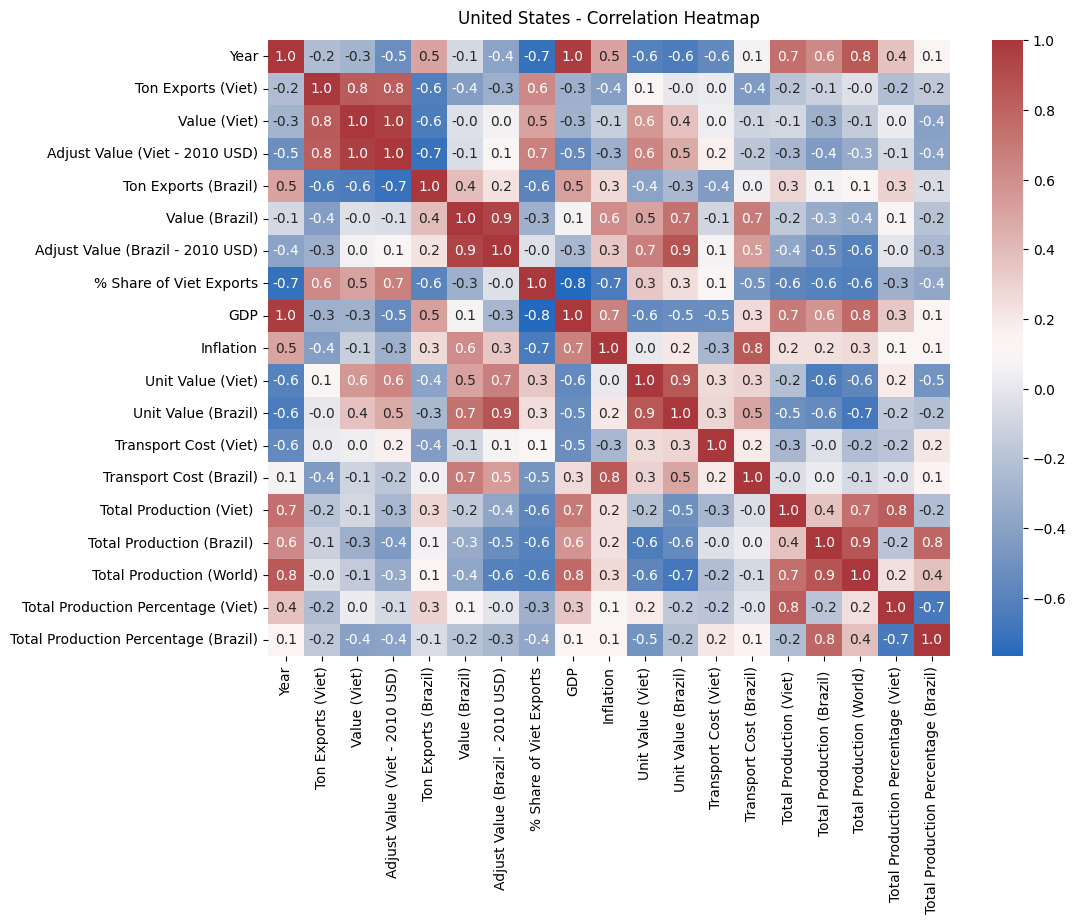

In [29]:
corr_us = df_us.corr()
plt.figure(figsize=(11,8))

# plotting triangle corr matrix
# matrix = np.triu(corr_us)
# sns.heatmap(corr_us, cmap="YlOrRd",annot=True, fmt=".1f", mask = matrix)

us_heatmap = sns.heatmap(corr_us, cmap="vlag",annot=True, fmt=".1f")
us_heatmap.set_title('United States - Correlation Heatmap', fontdict={'fontsize':12}, pad=12);
plt.show()

Text(0.5, 0, 'Year')

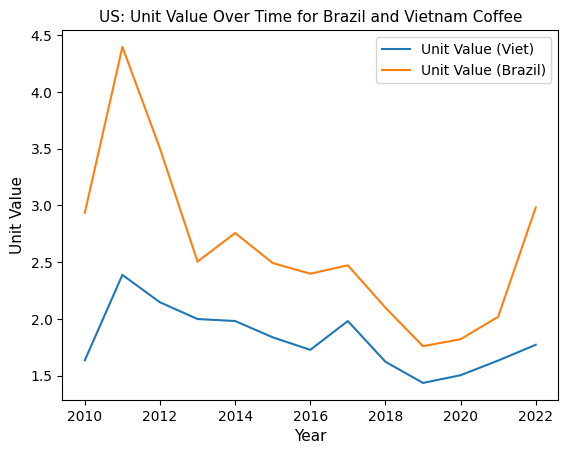

In [30]:
ax = plt.gca()

df_us.plot(x = "Year",
                y = "Unit Value (Viet)",
                ax = ax)

df_us.plot(x = "Year",
                y = "Unit Value (Brazil)",
                ax = ax)

plt.title('US: Unit Value Over Time for Brazil and Vietnam Coffee',fontsize=11)
plt.ylabel('Unit Value', fontsize=11)
plt.xlabel('Year', fontsize=11)

In [31]:
df_us.rename(columns={"Year": "US_year",
                           "% Share of Viet Exports": "US_percent_share",
                           "GDP": "US_GDP",
                           "Inflation": "US_Inflation",
                           "Unit Value (Viet)": "US_UV_Viet",
                           "Unit Value (Brazil)": "US_UV_Bra",
                           "Transport Cost (Viet)": "US_Transport_Viet",
                           "Transport Cost (Brazil)": "US_Transport_Bra",
                           "Total Production (Viet) ": "TP_Viet",
                           "Total Production (Brazil) ": "TP_Bra",
                           "Total Production (World)": "TP_World"
                           }, inplace=True)

# df_us

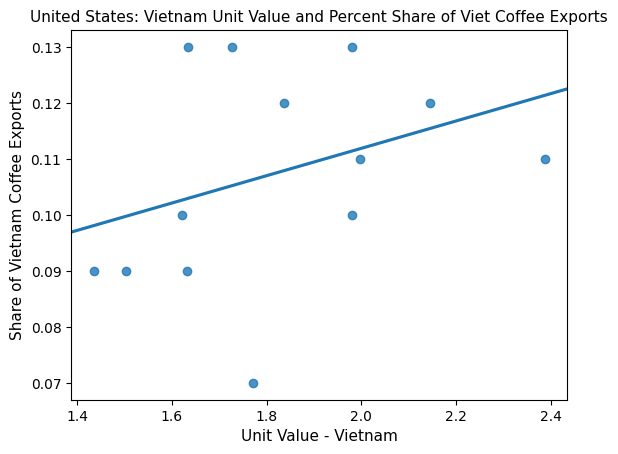

In [32]:
sns.regplot(data=df_us, x="US_UV_Viet", y="US_percent_share", robust= True, ci = None, truncate = False)
plt.title('United States: Vietnam Unit Value and Percent Share of Viet Coffee Exports', fontsize=11)
plt.ylabel('Share of Vietnam Coffee Exports', fontsize=11)
plt.xlabel('Unit Value - Vietnam', fontsize=11)
plt.show()

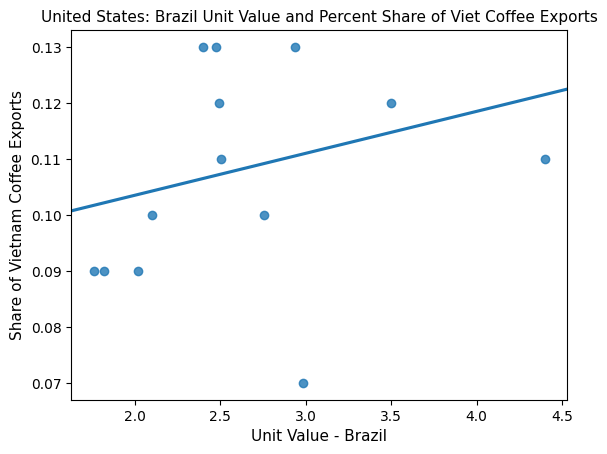

In [33]:
sns.regplot(data=df_us, x="US_UV_Bra", y="US_percent_share", robust= True, ci = None, truncate = False)
plt.title('United States: Brazil Unit Value and Percent Share of Viet Coffee Exports', fontsize=11)
plt.ylabel('Share of Vietnam Coffee Exports', fontsize=11)
plt.xlabel('Unit Value - Brazil', fontsize=11)
plt.show()



> **Regression Analysis Using statsmodel**



In [34]:
us_x_reg = df_us[['US_GDP', 'US_Inflation', 'US_UV_Viet', 'US_UV_Bra', 'US_Transport_Viet', 'US_Transport_Bra']]
us_y_reg = df_us['US_percent_share']

In [35]:
us_x_reg = sm.add_constant(us_x_reg)
us_model = sm.OLS(us_y_reg, us_x_reg).fit()
us_predictions = us_model.predict(us_x_reg)

us_print_model = us_model.summary()
print(us_print_model)

                            OLS Regression Results                            
Dep. Variable:       US_percent_share   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     4.727
Date:                Mon, 11 Dec 2023   Prob (F-statistic):             0.0330
Time:                        17:49:42   Log-Likelihood:                 43.276
No. Observations:                  13   AIC:                            -74.55
Df Residuals:                       7   BIC:                            -71.16
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3489      0.11

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "




> **Regression Analysis Using statsmodels with 'robust'**



In [36]:
us_model_robust = sm.OLS(us_y_reg, us_x_reg).fit(cov_type='HC1')
us_predictions_robust = us_model_robust.predict(us_x_reg)

us_print_model_robust = us_model_robust.summary()
print(us_print_model_robust)

                            OLS Regression Results                            
Dep. Variable:       US_percent_share   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     1.148
Date:                Mon, 11 Dec 2023   Prob (F-statistic):              0.418
Time:                        17:49:42   Log-Likelihood:                 43.276
No. Observations:                  13   AIC:                            -74.55
Df Residuals:                       7   BIC:                            -71.16
Df Model:                           5                                         
Covariance Type:                  HC1                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3489      0.09

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 6, but rank is 5
  warnings.warn('covariance of constraints does not have full '




> **Regression Analysis without UV_Viet**



In [37]:
US_x_reg_no_UV_viet = df_us[['US_GDP', 'US_Inflation', 'US_UV_Bra', 'US_Transport_Viet', 'US_Transport_Bra']]
US_y_reg_no_UV_viet = df_us['US_percent_share']

In [38]:
US_x_reg_no_UV_viet = sm.add_constant(US_x_reg_no_UV_viet)

US_model_no_UV_viet = sm.OLS(US_y_reg_no_UV_viet, US_x_reg_no_UV_viet).fit(cov_type='HC1')
US_predictions_no_UV_viet = US_model_no_UV_viet.predict(US_x_reg_no_UV_viet)

print(US_model_no_UV_viet.summary())

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 5, but rank is 4
  warnings.warn('covariance of constraints does not have full '


                            OLS Regression Results                            
Dep. Variable:       US_percent_share   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     1.588
Date:                Mon, 11 Dec 2023   Prob (F-statistic):              0.278
Time:                        17:49:42   Log-Likelihood:                 43.158
No. Observations:                  13   AIC:                            -74.32
Df Residuals:                       7   BIC:                            -70.93
Df Model:                           5                                         
Covariance Type:                  HC1                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3537      0.08



> **Creating Interaction Terms**





**1.   Interaction Term between GPD and Unit Values**



> Interaction between the GDP and unit value of Vietnam's coffee may  capture the economic conditions and consumer preferences in Vietnam and how pricing jointly affect the export share of Vietnamese coffee.


In [39]:
# df_us['US_interact_GPD_UV_Viet'] = df_us['US_GDP'] * df_us['US_UV_Viet']
# df_us['US_interact_GPD_UV_Bra'] = df_us['US_GDP'] * df_us['US_UV_Bra']




**2.   Interaction Term between Inflation and Brazil's Coffee Unit Values**

> The interaction term might capture a moderation effect, indicating that the impact of unit values is moderated by the level of inflation in exporting countries. In other words, the relationship between unit values and the export share may be stronger or weaker depending on the inflation rate of the country that is being exported to.






In [40]:
# df_us['US_interact_Inflation_UV_Bra'] = df_us['US_Inflation'] * df_us['US_UV_Bra']

In [41]:
# US_x_reg_interact_inflation = df_us[['US_GDP', 'US_Inflation', 'US_UV_Viet', 'US_UV_Bra', 'US_Transport_Viet', 'US_Transport_Bra','US_interact_Inflation_UV_Bra']]
# US_y_reg_interact_inflation = df_us['US_percent_share']

# US_x_reg_interact_inflation = sm.add_constant(US_x_reg_interact_inflation)

# US_model_interact_inflation = sm.OLS(US_y_reg_interact_inflation, US_x_reg_interact_inflation).fit(cov_type='HC1')
# US_predictions_interact_inflation = US_model_interact_inflation.predict(US_x_reg_interact_inflation)

# US_print_model_interact_inflation = US_model_interact_inflation.summary()
# print(US_print_model_interact_inflation)




**3. Interaction Term between Transportation Cost and Unit Values**


> Interaction between the transportation cost and the unit value might indicate how the cost of transportation interacts with the pricing of Vietnamese coffee in influencing exports.






In [42]:
# df_us['US_interact_Transport_UV_Viet'] = df_us['US_Transport_Viet'] * df_us['US_UV_Viet']
# df_us['US_interact_Transport_UV_Bra'] = df_us['US_Transport_Bra'] * df_us['US_UV_Bra']

In [43]:
# US_x_reg_interact_transport = df_us[['US_GDP', 'US_Inflation', 'US_UV_Viet', 'US_UV_Bra', 'US_Transport_Viet', 'US_Transport_Bra', 'US_interact_Transport_UV_Viet', 'US_interact_Transport_UV_Bra' ]]
# US_y_reg_interact_transport = df_us['US_percent_share']

# US_x_reg_interact_transport = sm.add_constant(US_x_reg_interact_transport)

# US_model_interact_transport = sm.OLS(US_y_reg_interact_transport, US_x_reg_interact_transport).fit(cov_type='HC1')
# US_predictions_interact_transport = US_model_interact_transport.predict(US_x_reg_interact_transport)

# US_print_model_interact_transport = US_model_interact_transport.summary()
# print(US_print_model_interact_transport)


**4. Interaction Term Between Transportation Cost & Inflation**


> Interaction between the transportation cost and inflation might help understand how changes in transportation costs relative to inflation, impacting the competitiveness of Vietnam's coffee exports.



In [44]:
# df_us['US_interact_Transport_Inf_Viet'] = df_us['US_Transport_Viet'] * df_us['US_Inflation']
# df_us['US_interact_Transport_Inf_Bra'] = df_us['US_Transport_Bra'] * df_us['US_Inflation']

In [45]:
# US_x_reg_interact_transport_inf = df_us[['US_GDP', 'US_Inflation', 'US_UV_Viet', 'US_UV_Bra', 'US_Transport_Viet', 'US_Transport_Bra', 'US_interact_Transport_Inf_Viet', 'US_interact_Transport_Inf_Bra' ]]
# US_y_reg_interact_transport_inf = df_us['US_percent_share']

# US_x_reg_interact_transport_inf = sm.add_constant(US_x_reg_interact_transport_inf)

# US_model_interact_transport_inf = sm.OLS(US_y_reg_interact_transport_inf, US_x_reg_interact_transport_inf).fit(cov_type='HC1')
# US_predictions_interact_transport_inf = US_model_interact_transport_inf.predict(US_x_reg_interact_transport_inf)

# US_print_model_interact_transport_inf = US_model_interact_transport_inf.summary()
# print(US_print_model_interact_transport_inf)


**5. Interaction Term Between Unit Value (Brazil) and Unit Value (Vietnam)**



In [46]:
df_us['US_Interact_UV'] = df_us['US_UV_Viet'] * df_us['US_UV_Bra']

In [47]:
US_x_reg_interact_UV = df_us[['US_GDP', 'US_Inflation', 'US_UV_Viet', 'US_UV_Bra', 'US_Transport_Viet', 'US_Transport_Bra', 'US_Interact_UV']]
US_y_reg_interact_UV = df_us['US_percent_share']

US_x_reg_interact_UV = sm.add_constant(US_x_reg_interact_UV)

US_model_interact_UV = sm.OLS(US_y_reg_interact_UV, US_x_reg_interact_UV).fit(cov_type='HC1')
US_predictions_interact_UV = US_model_interact_UV.predict(US_x_reg_interact_UV)

US_print_model_interact_UV = US_model_interact_UV.summary()
print(US_print_model_interact_UV)

                            OLS Regression Results                            
Dep. Variable:       US_percent_share   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     124.9
Date:                Mon, 11 Dec 2023   Prob (F-statistic):           4.95e-06
Time:                        17:49:42   Log-Likelihood:                 48.104
No. Observations:                  13   AIC:                            -82.21
Df Residuals:                       6   BIC:                            -78.25
Df Model:                           6                                         
Covariance Type:                  HC1                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0451      0.00

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 7, but rank is 6
  warnings.warn('covariance of constraints does not have full '




> **Creating a Lag Variable**



In [48]:
# df_us.sort_values('US_year', inplace=True)
# df_us['US_Lag'] = df_us['US_percent_share'].shift(1)

# df_us_lag = df_us.dropna()
# df_us_lag

In [49]:
# US_x_reg_lag = df_us_lag[['US_GDP', 'US_Inflation', 'US_UV_Viet', 'US_UV_Bra', 'US_Transport_Viet', 'US_Transport_Bra', 'US_Lag']]
# US_y_reg_lag = df_us_lag['US_percent_share']

# US_x_reg_lag = sm.add_constant(US_x_reg_lag)

# US_model_lag = sm.OLS(US_y_reg_lag, US_x_reg_lag).fit(cov_type='HC1')

# US_predictions_lag = US_model_lag.predict(US_x_reg_lag)

# print(US_model_lag.summary())

# **Analysis for Japan**

In [50]:
df_japan = pd.read_csv('Japan.csv', sep = ',')
df_japan

,Year,Ton Exports (Viet),Value (Viet),Adjust Value (Viet - 2010 USD),Ton Exports (Brazil),Value (Brazil),Adjust Value (Brazil - 2010 USD),% Share of Viet Exports,GDP,Inflation,Unit Value (Viet),Unit Value (Brazil),Transport Cost (Viet),Transport Cost (Brazil),Total Production (Viet),Total Production (Brazil),Total Production (World),Total Production Percentage (Viet),Total Production Percentage (Brazil)
0,2010,53052,85456.85,85456.85,123967.87,390865.00,390865.00,0.04,5.759070e+12,-0.728243,1.610813,3.152954,100.00,100.00,1164900,3270000,8484540,13.73,38.54
1,2011,50710,128252.00,124404.44,136198.17,671061.56,650929.71,0.04,6.233150e+12,-0.272456,2.453253,4.779284,98.03,114.00,1560000,2952000,8690220,17.95,33.97
2,2012,76605,171232.66,162671.03,133720.38,561695.25,533610.48,0.04,6.272360e+12,-0.044065,2.123504,3.990495,102.04,95.62,1590000,3456000,9481080,16.77,36.45
3,2013,78121,167606.72,157550.31,145569.92,455449.67,428122.69,0.06,5.212330e+12,0.335038,2.016747,2.941011,104.84,98.32,1789980,3432000,9603240,18.64,35.74
4,2014,76165,167762.46,154341.47,140560.10,489582.45,450415.85,0.05,4.896990e+12,2.759227,2.026415,3.204436,102.68,98.76,1644000,3258000,9227760,17.82,35.31
5,2015,118965,170955.75,157279.29,132128.60,440359.06,405130.33,0.09,4.444930e+12,0.795280,1.322064,3.066182,86.37,62.43,1735800,2964000,9144240,18.98,32.41
6,2016,104450,202984.07,184715.51,134195.44,413583.11,376360.63,0.06,5.003680e+12,-0.127259,1.768459,2.804571,85.53,60.40,1602000,3366000,9667740,16.57,34.82
7,2017,89725,209768.43,186693.90,107532.67,323976.68,288339.25,0.06,4.930840e+12,0.484200,2.080735,2.681411,89.69,77.79,1758000,3126000,9590340,18.33,32.60
8,2018,105119,245253.94,213370.93,120652.27,324195.79,282050.34,0.06,5.040880e+12,0.989095,2.029804,2.337713,98.69,94.46,1824000,3990000,10557360,17.28,37.79
9,2019,99967,171202.02,145521.72,148243.39,344652.92,292954.98,0.06,5.117990e+12,0.468776,1.455698,1.976176,104.96,79.65,1878000,3630000,10144800,18.51,35.78


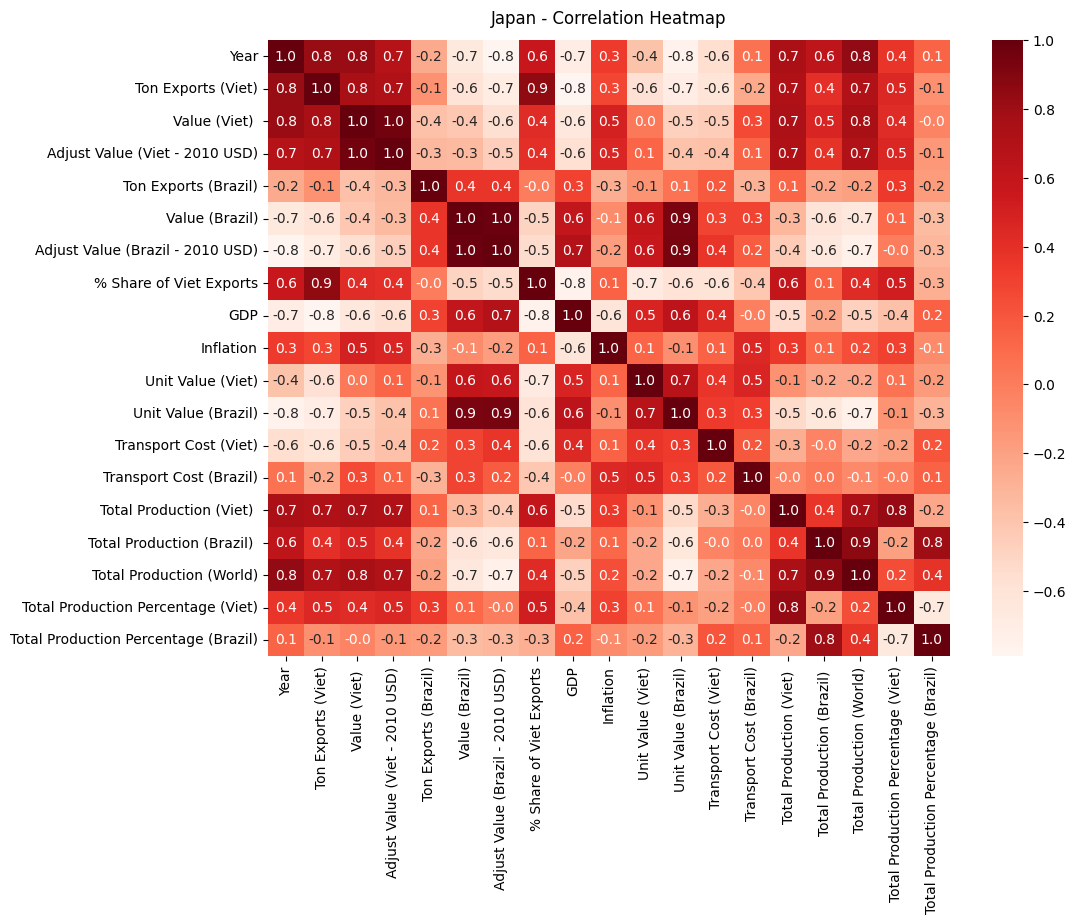

In [51]:
corr_jp = df_japan.corr()
plt.figure(figsize=(11,8))

# matrix = np.triu(corr)
# sns.heatmap(corr, cmap="YlOrRd",annot=True, fmt=".1f", mask = matrix)
jp_heatmap = sns.heatmap(corr_jp, cmap="Reds",annot=True, fmt=".1f")
jp_heatmap.set_title('Japan - Correlation Heatmap', fontdict={'fontsize':12}, pad=12);
plt.show()

Text(0.5, 0, 'Year')

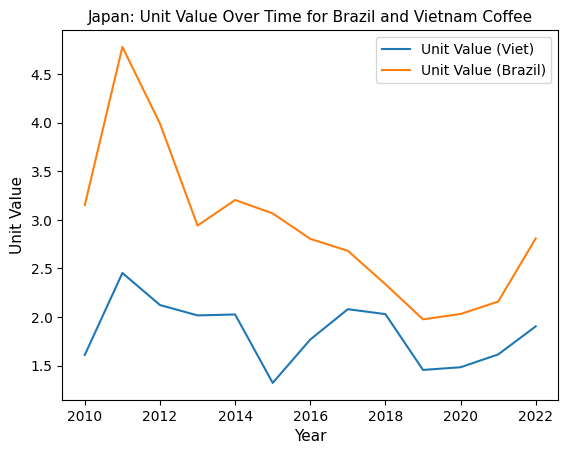

In [52]:
ax = plt.gca()

df_japan.plot(x = "Year",
                y = "Unit Value (Viet)",
                ax = ax)

df_japan.plot(x = "Year",
                y = "Unit Value (Brazil)",
                ax = ax)

plt.title('Japan: Unit Value Over Time for Brazil and Vietnam Coffee',fontsize=11)
plt.ylabel('Unit Value', fontsize=11)
plt.xlabel('Year', fontsize=11)

In [53]:
df_japan.rename(columns={"Year": "JP_year",
                           "% Share of Viet Exports": "JP_percent_share",
                           "GDP": "JP_GDP",
                           "Inflation": "JP_Inflation",
                           "Unit Value (Viet)": "JP_UV_Viet",
                           "Unit Value (Brazil)": "JP_UV_Bra",
                           "Transport Cost (Viet)": "JP_Transport_Viet",
                           "Transport Cost (Brazil)": "JP_Transport_Bra",
                           "Total Production (Viet) ": "TP_Viet",
                           "Total Production (Brazil) ": "TP_Bra",
                           "Total Production (World)": "TP_World"
                           }, inplace=True)

# df_japan.columns

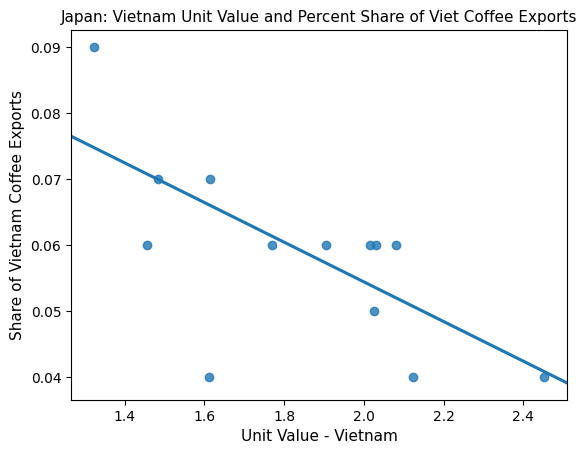

In [54]:
sns.regplot(data=df_japan, x="JP_UV_Viet", y="JP_percent_share", robust= True, ci = None, truncate = False)
plt.title('Japan: Vietnam Unit Value and Percent Share of Viet Coffee Exports', fontsize=11)
plt.ylabel('Share of Vietnam Coffee Exports', fontsize=11)
plt.xlabel('Unit Value - Vietnam', fontsize=11)
plt.show()

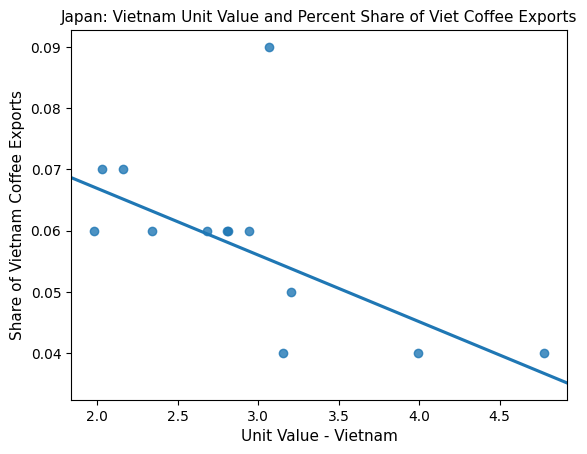

In [55]:
sns.regplot(data=df_japan, x="JP_UV_Bra", y="JP_percent_share", robust= True, ci = None, truncate = False)
plt.title('Japan: Vietnam Unit Value and Percent Share of Viet Coffee Exports', fontsize=11)
plt.ylabel('Share of Vietnam Coffee Exports', fontsize=11)
plt.xlabel('Unit Value - Vietnam', fontsize=11)
plt.show()



> **Regression Analysis Using statsmodels**

In [56]:
jp_x_reg = df_japan[['JP_GDP', 'JP_Inflation', 'JP_UV_Viet', 'JP_UV_Bra', 'JP_Transport_Viet', 'JP_Transport_Bra']]
jp_y_reg = df_japan['JP_percent_share']

In [57]:
jp_x_reg = sm.add_constant(jp_x_reg)
jp_model = sm.OLS(jp_y_reg, jp_x_reg).fit()
predictions = jp_model.predict(jp_x_reg)

jp_print_model = jp_model.summary()
print(jp_print_model)

                            OLS Regression Results                            
Dep. Variable:       JP_percent_share   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     5.002
Date:                Mon, 11 Dec 2023   Prob (F-statistic):             0.0355
Time:                        17:49:48   Log-Likelihood:                 49.168
No. Observations:                  13   AIC:                            -84.34
Df Residuals:                       6   BIC:                            -80.38
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2023      0.03

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "




> **Regression Analysis Using statsmodels with 'robust'**



In [58]:
jp_model_robust = sm.OLS(jp_y_reg, jp_x_reg).fit(cov_type='HC1')
jp_predictions = jp_model_robust.predict(jp_x_reg)

jp_print_model_robust = jp_model_robust.summary()
print(jp_print_model_robust)

                            OLS Regression Results                            
Dep. Variable:       JP_percent_share   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     3.292
Date:                Mon, 11 Dec 2023   Prob (F-statistic):             0.0896
Time:                        17:49:48   Log-Likelihood:                 49.168
No. Observations:                  13   AIC:                            -84.34
Df Residuals:                       6   BIC:                            -80.38
Df Model:                           6                                         
Covariance Type:                  HC1                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2023      0.03

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 6, but rank is 5
  warnings.warn('covariance of constraints does not have full '




> **Creating Interaction Terms**





**1. Interaction Term between GPD and Unit Values**




In [59]:
# df_japan['JP_interact_GPD_UV_Viet'] = df_japan['JP_GDP'] * df_japan['JP_UV_Viet']
# df_japan['JP_interact_GPD_UV_Bra'] = df_japan['JP_GDP'] * df_japan['JP_UV_Bra']



**2. Interaction Term between Inflation and Brazil's Coffee Unit Values**



In [60]:
# df_japan['JP_interact_Inflation_UV_Bra'] = df_japan['JP_Inflation'] * df_japan['JP_UV_Bra']

In [61]:
# JP_x_reg_interact_inflation = df_japan[['JP_GDP', 'JP_Inflation', 'JP_UV_Viet', 'JP_UV_Bra', 'JP_Transport_Viet', 'JP_Transport_Bra','JP_interact_Inflation_UV_Bra']]
# JP_y_reg_interact_inflation = df_japan['JP_percent_share']

# JP_x_reg_interact_inflation = sm.add_constant(JP_x_reg_interact_inflation)

# JP_model_interact_inflation = sm.OLS(JP_y_reg_interact_inflation, JP_x_reg_interact_inflation).fit(cov_type='HC1')
# JP_predictions_interact_inflation = JP_model_interact_inflation.predict(JP_x_reg_interact_inflation)

# JP_print_model_interact_inflation = JP_model_interact_inflation.summary()
# print(JP_print_model_interact_inflation)


**3. Interaction Term between Transportation Cost and Unit Values**



In [62]:
# df_japan['JP_interact_Transport_UV_Viet'] = df_japan['JP_Transport_Viet'] * df_japan['JP_UV_Viet']
# df_japan['JP_interact_Transport_UV_Bra'] = df_japan['JP_Transport_Bra'] * df_japan['JP_UV_Bra']

In [63]:
# JP_x_reg_interact_transport = df_japan[['JP_GDP', 'JP_Inflation', 'JP_UV_Viet', 'JP_UV_Bra', 'JP_Transport_Viet', 'JP_Transport_Bra', 'JP_interact_Transport_UV_Viet', 'JP_interact_Transport_UV_Bra' ]]
# JP_y_reg_interact_transport = df_japan['JP_percent_share']

# JP_x_reg_interact_transport = sm.add_constant(JP_x_reg_interact_transport)

# JP_model_interact_transport = sm.OLS(JP_y_reg_interact_transport, JP_x_reg_interact_transport).fit(cov_type='HC1')
# JP_predictions_interact_transport = JP_model_interact_transport.predict(JP_x_reg_interact_transport)

# JP_print_model_interact_transport = JP_model_interact_transport.summary()
# print(JP_print_model_interact_transport)



**4. Interaction Term Between Transportation Cost & Inflation**



In [64]:
# df_japan['JP_interact_Transport_Inf_Viet'] = df_japan['JP_Transport_Viet'] * df_japan['JP_Inflation']
# df_japan['JP_interact_Transport_Inf_Bra'] = df_japan['JP_Transport_Bra'] * df_japan['JP_Inflation']

In [65]:
# JP_x_reg_interact_transport_inf = df_japan[['JP_GDP', 'JP_Inflation', 'JP_UV_Viet', 'JP_UV_Bra', 'JP_Transport_Viet', 'JP_Transport_Bra', 'JP_interact_Transport_Inf_Viet', 'JP_interact_Transport_Inf_Bra' ]]
# JP_y_reg_interact_transport_inf = df_japan['JP_percent_share']

# JP_x_reg_interact_transport_inf = sm.add_constant(JP_x_reg_interact_transport_inf)

# JP_model_interact_transport_inf = sm.OLS(JP_y_reg_interact_transport_inf, JP_x_reg_interact_transport_inf).fit(cov_type='HC1')
# JP_predictions_interact_transport_inf = JP_model_interact_transport_inf.predict(JP_x_reg_interact_transport_inf)

# JP_print_model_interact_transport_inf = JP_model_interact_transport_inf.summary()
# print(JP_print_model_interact_transport_inf)



**5. Interaction Term Between Unit Value (Vietnam) and Unit Value (Brazil)**





In [66]:
df_japan['JP_Interact_UV'] = df_japan['JP_UV_Viet'] * df_japan['JP_UV_Bra']

In [67]:
JP_x_reg_interact_UV = df_japan[['JP_GDP', 'JP_Inflation', 'JP_UV_Viet', 'JP_UV_Bra', 'JP_Transport_Viet', 'JP_Transport_Bra', 'JP_Interact_UV']]
JP_y_reg_interact_UV = df_japan['JP_percent_share']

JP_x_reg_interact_UV = sm.add_constant(JP_x_reg_interact_UV)

JP_model_interact_UV = sm.OLS(JP_y_reg_interact_UV, JP_x_reg_interact_UV).fit(cov_type='HC1')
JP_predictions_interact_UV = JP_model_interact_UV.predict(JP_x_reg_interact_UV)

print(JP_model_interact_UV.summary())

                            OLS Regression Results                            
Dep. Variable:       JP_percent_share   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     4.225
Date:                Mon, 11 Dec 2023   Prob (F-statistic):             0.0676
Time:                        17:49:48   Log-Likelihood:                 49.888
No. Observations:                  13   AIC:                            -83.78
Df Residuals:                       5   BIC:                            -79.26
Df Model:                           7                                         
Covariance Type:                  HC1                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2533      0.06

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 7, but rank is 6
  warnings.warn('covariance of constraints does not have full '




> **Creating a Lag Variable**



In [68]:
# df_japan.sort_values('JP_year', inplace=True)
# df_japan['JP_Lag'] = df_japan['JP_percent_share'].shift(1)

# df_japan_lag = df_japan.dropna()
# df_japan_lag

In [69]:
# JP_x_reg_lag = df_japan_lag[['JP_GDP', 'JP_Inflation', 'JP_UV_Viet', 'JP_UV_Bra', 'JP_Transport_Viet', 'JP_Transport_Bra', 'JP_Lag']]
# JP_y_reg_lag = df_japan_lag['JP_percent_share']

# JP_x_reg_lag = sm.add_constant(JP_x_reg_lag)

# JP_model_lag = sm.OLS(JP_y_reg_lag, JP_x_reg_lag).fit(cov_type='HC1')

# JP_predictions_lag = JP_model_lag.predict(JP_x_reg_lag)

# JP_print_model_lag = JP_model_lag.summary()
# print(JP_print_model_lag)


Text(0.5, 0, 'Year')

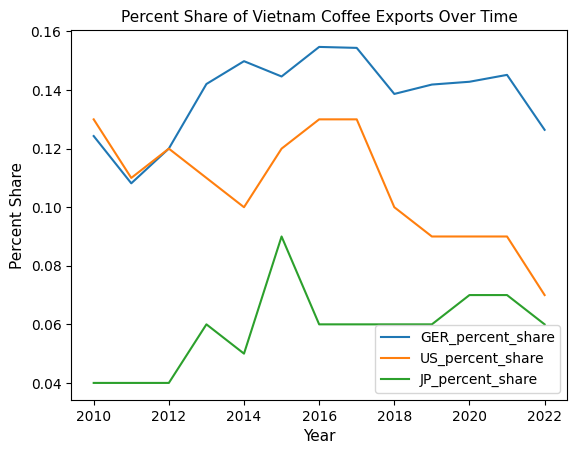

In [70]:
ax = plt.gca()

df_germany.plot(x = "GER_year",
                y = "GER_percent_share",
                ax = ax)

df_us.plot(x = "US_year",
                y = "US_percent_share",
                ax = ax)

df_japan.plot(x = "JP_year",
                y = "JP_percent_share",
                ax = ax)

plt.title('Percent Share of Vietnam Coffee Exports Over Time',fontsize=11)
plt.ylabel('Percent Share', fontsize=11)
plt.xlabel('Year', fontsize=11)